In [160]:
"""
Created on Aug 4 2021

@author: rodrigo pena
"""

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['savefig.dpi'] = 120

torch.manual_seed(0)

In [161]:
'''load the cross-correlation data from the simulation and the labels'''

data_cxy = np.loadtxt('crss.dat').astype(np.float32)
label_cxy = np.loadtxt('lbs.dat').astype(np.float32)
data_cxy = torch.from_numpy(data_cxy)
label_cxy = torch.from_numpy(label_cxy)

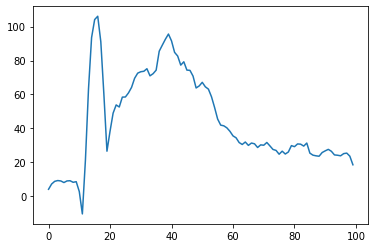

In [162]:
plt.plot(data_cxy[2])

In [163]:
class SoftMax(nn.Module):
    
    def __init__(self,input_size,output_size):
        super(SoftMax, self).__init__()
        self.linear = nn.Linear(input_size,output_size)
            
    def forward(self,x):
        z = self.linear(x)
        return z

In [164]:
input_dim = 100
output_dim = 3
learning_rate=0.01

model = SoftMax(input_dim,output_dim)
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
criterion = nn.CrossEntropyLoss()
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=100, out_features=3, bias=True)
)


In [165]:
# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([3, 100])
b:  torch.Size([3])


In [166]:
my_data_train = []
my_data_val = []
for i in range(len(data_cxy)):
    if i < len(data_cxy)/2:
        my_data_train.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])
    else:    
        my_data_val.append([data_cxy[i], label_cxy[i].type(torch.LongTensor)])

train_set = torch.utils.data.DataLoader(dataset=my_data_train,batch_size=10)
val_set = torch.utils.data.DataLoader(dataset=my_data_val,batch_size=10)
# train_set, val_set = torch.utils.data.random_split(my_data, [800, 800])


In [167]:
loss_list = []
accuracy_list = []
N_test = len(my_data_val)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x,y in train_set:
            optimizer.zero_grad()
            z = model(x)
            loss = criterion(z,y)
            loss.backward()
            optimizer.step()
            
        correct = 0
        for x_test, y_test in val_set:
            z = model(x_test)
            _, yhat = torch.max(z.data,1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)
train_model(1000)

(-1.0, 300.0)

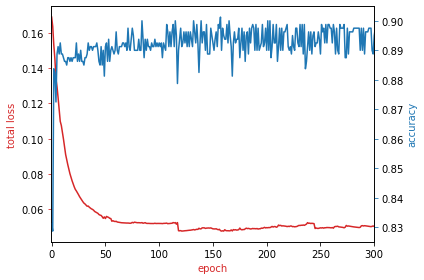

In [170]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()
plt.xlim([-1,300])